In [1]:
import json
import pandas as pd
import numpy as np
from nltk import *
from nltk.corpus import stopwords
import spacy
import datetime
import time
import matplotlib.pyplot as plt
from spacy.tokens import Span

In [296]:
# Declaration:
# This notebook covers the Data Exploration (30 marks), Data Prepreocessing (20 marks), and Linguistic Patterns (20 marks)
# Chatbot implementation will be covered in project1_bot.py

In [2]:
#Read json file
df = pd.read_json("frames.json",encoding="utf-8")
with open("frames.json", 'r') as f:
    temp = json.loads(f.read())

In [3]:
#Check out the keys
df.keys()

Index(['user_id', 'turns', 'wizard_id', 'id', 'labels'], dtype='object')

In [4]:
#DE task1

"""
As we can see, user_id , wizard_id, id are unique string values, labels are dict with key 
"userSurveyRating" and "wizardSurveyTaskSuccessful", turns are lists with nested dict
"""

df.head()

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."


In [5]:
#DE task 1
#Write a revursive function to extract all keys of turns
key_list=[]
def getJsonKey(json_data):
    
    """
    Function : getJsonKey() will recursively return all the keys in 'turns'
    """
    
    for key in json_data.keys():
        try:
            key_list.append(key)
            getJsonKey(json_data[key])
        except Exception as e:
            if "'list' object has no attribute 'keys'" == str(e):
                getJsonKey(json_data[key][0])
            pass        

for key in temp[0].keys():
    key_list.append(key)
    getJsonKey(temp[0]['turns'][0])
print(set(key_list))

{'frames', 'author', 'acts_without_refs', 'user_id', 'active_frame', 'dst_city', 'acts', 'budget', 'n_adults', 'turns', 'timestamp', 'key', 'intent', 'id', 'or_city', 'val', 'args', 'str_date', 'negated', 'frame_id', 'text', 'requests', 'name', 'labels', 'wizard_id', 'info'}


In [7]:
#DE task1
#Take first turn as example, display the structure as a table

turns = pd.DataFrame(df['turns'][1])
final = pd.json_normalize(json.loads(turns.to_json(orient = "records")))
final

,text,author,timestamp,db,labels.acts,labels.acts_without_refs,labels.active_frame,labels.frames,db.result,db.search
0,"Hello, I am looking to book a vacation from Go...",user,1.471272e+12,NaN,"[{'args': [{'val': 'book', 'key': 'intent'}], ...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",1,"[{'info': {'intent': [{'val': 'book', 'negated...",NaN,NaN
1,"Hi. Sorry, I can't find any trips from Gotham ...",wizard,1.471272e+12,NaN,"[{'args': [], 'name': 'sorry'}, {'args': [{'va...",NaN,1,"[{'info': {'or_city': [{'val': 'Gotham City', ...",[[{'trip': {'returning': {'duration': {'hours'...,"[{'NUM_ADULTS': '1', 'RESULT_LIMIT': '10', 'ti..."
2,What about a trip from Gotham City to Neverlan...,user,1.471272e+12,NaN,"[{'args': [{'val': 'Neverland', 'key': 'dst_ci...","[{'args': [{'val': 'Neverland', 'key': 'dst_ci...",2,"[{'info': {'or_city': [{'val': 'Gotham City', ...",NaN,NaN
3,"Sorry, I cannot find any trips leaving from Go...",wizard,1.471272e+12,NaN,"[{'args': [], 'name': 'sorry'}, {'args': [{'va...",NaN,2,"[{'info': {'or_city': [{'val': 'Gotham City', ...",[[{'trip': {'returning': {'duration': {'hours'...,"[{'ORIGIN_CITY': 'gotham city', 'NUM_ADULTS': ..."
4,Would any packages to Mos Eisley be available ...,user,1.471272e+12,NaN,"[{'args': [{'val': 'Mos Eisley', 'key': 'dst_c...","[{'args': [{'val': 'Mos Eisley', 'key': 'dst_c...",3,"[{'info': {'or_city': [{'val': 'Gotham City', ...",NaN,NaN
5,There are no trips available to Mos Eisley.,wizard,1.471272e+12,NaN,[{'args': [{'val': [{'annotations': [{'val': '...,NaN,3,"[{'info': {'or_city': [{'val': 'Gotham City', ...",[[{'trip': {'returning': {'duration': {'hours'...,"[{'ARE_DATES_FLEXIBLE': 'true', 'RESULT_LIMIT'..."
6,"You know what, I'd like to try and visit Never...",user,1.471273e+12,NaN,"[{'args': [{'val': 'Neverland', 'key': 'dst_ci...","[{'args': [{'val': 'Neverland', 'key': 'dst_ci...",4,"[{'info': {'or_city': [{'val': 'Gotham City', ...",NaN,NaN
7,I cannot find any trips available to Neverland.,wizard,1.471273e+12,NaN,[{'args': [{'val': [{'annotations': [{'val': '...,NaN,4,"[{'info': {'or_city': [{'val': 'Gotham City', ...",[[{'trip': {'returning': {'duration': {'hours'...,"[{'ARE_DATES_FLEXIBLE': 'true', 'RESULT_LIMIT'..."
8,Do you have any trips from Gotham City to Kobe...,user,1.471273e+12,NaN,"[{'args': [{'val': 'Kobe', 'key': 'dst_city'},...","[{'args': [{'val': 'Kobe', 'key': 'dst_city'},...",5,"[{'info': {'or_city': [{'val': 'Gotham City', ...",NaN,NaN
9,I can book you a 3 day trip to Kobe leaving fr...,wizard,1.471273e+12,NaN,"[{'args': [{'val': '3 day', 'key': 'duration'}...",NaN,5,"[{'info': {'or_city': [{'val': 'Gotham City', ...",[[{'trip': {'returning': {'duration': {'hours'...,"[{'NUM_ADULTS': '1', 'RESULT_LIMIT': '10', 'ti..."


In [7]:
#DE task 2
def getIntents():

    """
    Return all intents
    """
    
    intents = [df['turns'][i][j]['labels']['acts'][k]['name'] for i in range(len(df)) for j in range(len(df['turns'][i])) 
               for k in range(len(df['turns'][i][j]['labels']['acts']))]
    return intents

In [8]:
#DE task 2
#Print out all intents in frame.json with corresponse frequencies

intents = getIntents()
intents_dic = {}
for i in set(intents):
    intents_dic[i] = intents.count(i)
    print(i, intents.count(i))

offer 4097
negate 391
reject 14
switch_frame 2102
canthelp 61
affirm 543
suggest 1821
sorry 756
confirm 384
you_are_welcome 87
request 3438
inform 10918
hearmore 100
request_alts 216
thankyou 859
request_compare 214
greeting 603
moreinfo 244
no_result 1218
goodbye 229


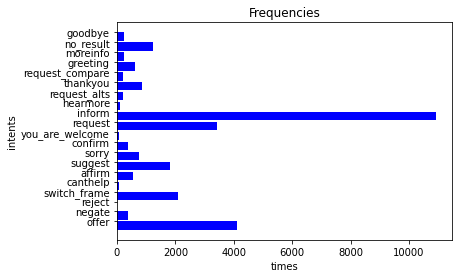

In [9]:
#DE task 2
#Visiualize it

x = list(intents_dic.keys())
y = list(intents_dic.values())

fig, ax = plt.subplots()    
width = 0.85 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Frequencies')
plt.xlabel('times')
plt.ylabel('intents')      
plt.show()

In [10]:
#DE Task 3
#Extract text pairs with each db informations (search, results, (user_text, wizard_text))
dbs1 = [(df['turns'][i][j]['db']['search'][k], df['turns'][i][j]['db']['result'][k], (df['turns'][i][j-1]['text'], df['turns'][i][j]['text'])) 
             for i in range(len(df)) 
             for j in range(len(df['turns'][i])) if df['turns'][i][j]['author'] == 'wizard' 
             for k in range(len(df['turns'][i][j]['db']['search']))
       ]

In [11]:
#DE task 3
#This function will be able to process difficult level 1 and 2
#This function will return text paris and serch results, it can be used for parsing user inputs and get the matched results

def get_low_difficult_querys_db(str_d, end_d, dst, budget):

    """
    difficult level 1 and 2
    @str_d, end_d:  <class 'datetime.datetime'>
                    %Y-%m-%d %H:%M:%S (2016-08-02 12:00:00)
    @dst: string
    @budget: string
    returns: text paris and serch results
    """
    
    results = []
    texts = []
    if str_d !=None and end_d !=None:
        str_d = datetime.datetime.timestamp(str_d)
        end_d = datetime.datetime.timestamp(end_d)
        
    #Only use 100 date in db for testing  
    for i in dbs1[:100]:
        if 'START_TIME' in i[0]:
            str_t = i[0]['START_TIME']
            
        if 'END_TIME' in i[0]:
            end_t = i[0]['END_TIME']
        try:  
            if (str_d == None and end_d == None):
                if i[0]['DESTINATION_CITY'].lower() == dst and int(i[0]['PRICE_MAX']) <= int(budget):
                    results.append(i[1])
                    texts.append(i[2])
            elif (dst == None):
                if int(i[0]['PRICE_MAX']) <= int(budget) and float(str_t) > float(str_d) and float(end_t) > float(end_d):
                    results.append(i[1])
                    texts.append(i[2])
            elif budget == None:
                if i[0]['DESTINATION_CITY'].lower() == dst:
                    results.append(i[1])
                    texts.append(i[2]) 
            else: 
                if i[0]['DESTINATION_CITY'].lower() == dst and int(i[0]['PRICE_MAX']) <= int(budget) \
                        and float(str_t) > float(str_d) and float(end_t) > float(end_d):
                    results.append(i[1])
                    texts.append(i[2])       
                
        except Exception as e:
            pass

    return results, texts
 

In [288]:
#DE task 3
#This function can handle dicfficult level 3

def get_high_difficult_querys_db(str_d, end_d, dst, budget):
    """
    difficult level 3
    @str_d, end_d:  <class 'datetime.datetime'>
                    %Y-%m-%d %H:%M:%S (2016-08-02 12:00:00)
    @dst: string
    @budget: string
    returns: text paris and serch results
    """
    
    results = []
    texts = []
    get = {}
    if str_d == None or end_d == None:
        get['date'] = None
    else:
        str_d = datetime.datetime.timestamp(str_d)
        end_d = datetime.datetime.timestamp(end_d)       
        get['date'] = (str_d, end_d)
        
    get['dst'] = dst
    get['budget'] = budget
    
    val = [(k, v) for k, v, in get.items() if v != None]
    if len(val) > 1:     #if more than 1 intent, return
        return
    
    #Only use 100 date in db for testing
    for i in dbs1[:100]:
        if 'START_TIME' in i[0]:
            str_t = i[0]['START_TIME']

        if 'END_TIME' in i[0]:
            end_t = i[0]['END_TIME']

        try:
            if len(val) == 1 and val[0][0] == 'dst':
                if 'DESTINATION_CITY' in i[0] and i[0]['DESTINATION_CITY'].lower() == dst:
                    results.append(i[1])
                    texts.append(i[2]) 
            elif len(val) == 1 and val[0][0] == 'budget':
                if 'PRICE_MAX' in i[0] and int(i[0]['PRICE_MAX']) <= int(budget):
                    results.append(i[1])
                    texts.append(i[2]) 
            elif len(val) == 1 and val[0][0] == 'date':
                if float(str_t) > float(str_d) and float(end_t) > float(end_d):
                    results.append(i[1])
                    texts.append(i[2]) 
        except Exception as e:
            pass
    
    return texts, results           

In [289]:
#DE task 3
str_d=  datetime.datetime.strptime('2016-08-04 12:00:00', '%Y-%m-%d %H:%M:%S')
end_d=  datetime.datetime.strptime('2016-08-19 12:00:00', '%Y-%m-%d %H:%M:%S')
budget = '3000'
dst = 'brazil'

In [290]:
#DE task 3
#Difficult level 3 with dst and budget missing
set(get_high_difficult_querys_db(str_d, end_d, None, None)[0])

{('2 adults',
  'I have no trips to Caprica from Busan.  I do have a trip to Mannheim, Germany, one to Kingston , Canada, and another to Toronto Canada.  Would you like to select alternate dates or an alternate travel destination?'),
 ('Actually I am leaving from Melbourne, Australia. How does this affect the price of the trip?',
  'I cannot find any trips available from Melbourne, Australia to Mexico City.'),
 ('Actually I will be departing from Vancouver, British Columbia, do you have packages to Recife?',
  'I can book 11 days in Recife leaving from Vancouver for 2171.6USD.'),
 ("Anywhere, I'm looking for an adventure. What do you have?",
  'How about Mexico or Porto Alegre?'),
 ('Can you please suggest some destinations that are available? I am leaving from Detroit.',
  'I have no departures available from Detroit. for these dates.  Would you like to make a date change?'),
 ('Could I purchase a package  to Vancouver similar to the one I was offered?',
  'I cannot find any trips ava

In [291]:
#DE task 3
#Difficult level 3 with time period and budget missing
set(get_high_difficult_querys_db(None, None, dst, None)[0])

{("I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria.  Would you like to book an alternate travel option?')}

In [292]:
#DE task 3
#Difficult level 3 with time period and dst missing
set(get_high_difficult_querys_db(None, None, None, budget)[0])

{('Do you have any trips from Gotham City to Kobe for my original budget of $2100?',
  'I can book you a 3 day trip to Kobe leaving from Sapporo, Japan. Is this ok?'),
 ('Hello, I am looking to book a vacation from Gotham City to Mos Eisley for $2100.',
  "Hi. Sorry, I can't find any trips from Gotham City to Mos Eisley for you."),
 ('I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?',
  'I checked the availability for that date and there were no trips available.  Would you like to select some alternate dates?'),
 ("I'd like to adjust the departure city to Caprica.",
  'Still no availability for this destination.  Would you like to increase your budget or adjust the dates?'),
 ("I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria.  Would you like

In [293]:
#DE task 3
#Difficult level 3 to compare the result packages by calculating price/duration days (Just one way to evaluate the 
#multiple packages)
def get_best_pack(result):
    get = []
    try:   
        for i in result:
            for j in i:
                weight = j['price'] / j['trip']['duration_days']
                get.append((j, weight))
    except Exception as e:
        pass
    return get

In [294]:
#DE task 3
#Sorting the packages by weight that calculated in get_best_pack()
result = get_high_difficult_querys_db(str_d, end_d, None, None)[1]
get = get_best_pack(result)
a= [i[0] for i in sorted(get, key = lambda x:x[1], reverse = False)]
a[0]

{'trip': {'returning': {'duration': {'hours': 0, 'min': 44},
   'arrival': {'hour': 4, 'year': 2016, 'day': 24, 'min': 44, 'month': 8},
   'departure': {'hour': 4, 'year': 2016, 'day': 24, 'min': 0, 'month': 8}},
  'seat': 'BUSINESS',
  'leaving': {'duration': {'hours': 0, 'min': 44},
   'arrival': {'hour': 11, 'year': 2016, 'day': 17, 'min': 44, 'month': 8},
   'departure': {'hour': 11, 'year': 2016, 'day': 17, 'min': 0, 'month': 8}},
  'or_city': 'Vancouver',
  'duration_days': 7},
 'price': 142.16,
 'hotel': {'gst_rating': 0,
  'vicinity': [],
  'name': 'Amusement',
  'country': 'Canada',
  'amenities': ['FREE_PARKING', 'FREE_WIFI'],
  'dst_city': 'Calgary',
  'category': '4.0 star hotel'}}

In [241]:
#DE task 3
#Difficult level 1 with known time period, budget, destination
str_d=  datetime.datetime.strptime('2016-08-04 12:00:00', '%Y-%m-%d %H:%M:%S')
end_d=  datetime.datetime.strptime('2016-08-19 12:00:00', '%Y-%m-%d %H:%M:%S')
budget = '5000'
dst = 'brazil'
set(get_low_difficult_querys_db(str_d, end_d, dst, budget)[1])

#This line will get the matched search results in db
#get_low_difficult_querys_db(str_d, end_d, dst, budget)[0]

{("I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria.  Would you like to book an alternate travel option?')}

In [242]:
#DE task 3
#Difficult level 2 with time period missing

dst = 'kobe'
budget = '2474'
set(get_low_difficult_querys_db(None, None, dst, budget)[1])

#This line will get the matched search results in db
#get_low_difficult_querys_db(None, None, dst, budget)[0]

{('Do you have any trips from Gotham City to Kobe for my original budget of $2100?',
  'I can book you a 3 day trip to Kobe leaving from Sapporo, Japan. Is this ok?'),
 ("No, that's too far for me. I need a flight that leaves from Birmingham.",
  'I can book you a trip from Birmingham to Kobe for 2747.8 USD.'),
 ('Ok, then I would like to purchase this package. What activities are included in this package?',
  'There are no activities listed for this package. You will be staying at the Ivory Legacy Hotel for 7 days. This hotel has a 4.5 star rating and free wifi. Will I go ahead and book this package?'),
 ('What would the price be if I shortened my trip by one day?',
  'I can not find any trips from Birmingham to Kobe for 4 days.')}

In [14]:
#DE task 3
#Difficult level 2 with destination city missing

str_d=  datetime.datetime.strptime('2016-08-04 12:00:00', '%Y-%m-%d %H:%M:%S')
end_d=  datetime.datetime.strptime('2016-08-19 12:00:00', '%Y-%m-%d %H:%M:%S')
budget = '5000'
set(get_low_difficult_querys_db(str_d, end_d, None, budget)[1])

#This line will get the matched search results in db
#get_low_difficult_querys_db(str_d, end_d, None, budget)[0]

{("Anywhere, I'm looking for an adventure. What do you have?",
  'How about Mexico or Porto Alegre?'),
 ('Can you please suggest some destinations that are available? I am leaving from Detroit.',
  'I have no departures available from Detroit. for these dates.  Would you like to make a date change?'),
 ("I'd like to adjust the departure city to Caprica.",
  'Still no availability for this destination.  Would you like to increase your budget or adjust the dates?'),
 ("I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria.  Would you like to book an alternate travel option?'),
 ("I'm looking for a trip to Gotham City leaving from Kakariko Village on Saturday, August 13, 2016. 3 adults for no more than $2400 USD.",
  'I have a trip available to Vancouver for these dates within your price range.  Would 

In [15]:
#DE task 3
#Difficult level 2 with budget missing

str_d=  datetime.datetime.strptime('2016-08-04 12:00:00', '%Y-%m-%d %H:%M:%S')
end_d=  datetime.datetime.strptime('2016-10-28 12:00:00', '%Y-%m-%d %H:%M:%S')
dst = 'brazil'
set(get_low_difficult_querys_db(str_d, end_d, dst, None)[1])

#This line will get the matched search results in db
#get_low_difficult_querys_db(str_d, end_d, dst, None)[0]

{("I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria.  Would you like to book an alternate travel option?')}

In [17]:
#DE Task 4
#Extract user texts and wizard texts
texts_user = [df['turns'][i][j]['text'] for i in range(len(df)) for j in range(len(df['turns'][i])) if df['turns'][i][j]['author'] == "user"]
texts_wizard = [df['turns'][i][j]['text'] for i in range(len(df)) for j in range(len(df['turns'][i])) if df['turns'][i][j]['author'] == "wizard"]
nlp = spacy.load('en_core_web_sm')

In [26]:
#DE Task 4
#Make them as a big string (My mac is so limited to compute the whole size, so i made it up tp 5000)
users = nlp('.'.join(texts_user[:5000]))
wizards = nlp('.'.join(texts_wizard[:5000]))

In [27]:
token_text1 = [token.text for token in users]

In [28]:
token_text2 = [token.text for token in wizards]

In [29]:
#report size
print("User vocab size is : {}, Wizard vocal size is : {}".format(len(token_text1), len(token_text2)))

User vocab size is : 60025, Wizard vocal size is : 86020


In [32]:
#Data Exploration task4
#Plot function
def word_freq_user_wizard():
   
    fdist1 = FreqDist(token_text1)
    fdist2 = FreqDist(token_text2)
    
    450 is changable
    fdist1.plot(40, cumulative=True)
    fdist2.plot(40, cumulative=True)

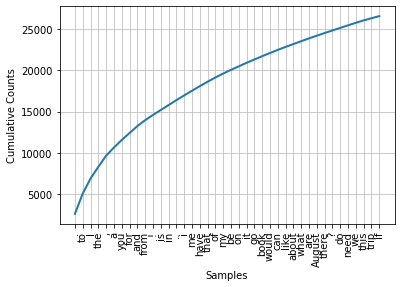

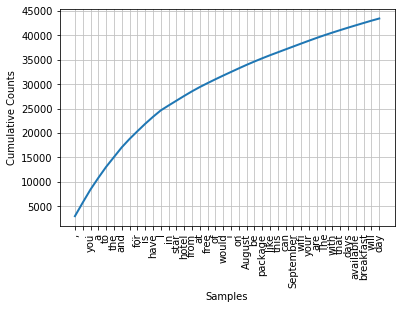

In [33]:
#Data Exploration task4
#Plot it

word_freq_user_wizard()

In [34]:
#Data Prepreocessing task2
"""
@Para users_to_lemma: Save the tokenized words after lemma by spacy.
@Para wizards_to_lemma: Save the tokenized words after lemma by spacy.
@Para stem: Save the tokenized words after lemma by nltk.
"""

# users_to_lemma = [users[i][token].lemma_ for i in range(len(users)) for token in range(len(users[i]))]
# wizards_to_lemma = [wizards[i][token].lemma_ for i in range(len(wizards)) for token in range(len(wizards[i]))]

users_to_lemma = [users[token].lemma_ for token in range(len(users))]
wizards_to_lemma = [wizards[token].lemma_ for token in range(len(wizards))]
ps = PorterStemmer ()
stem = [ps.stem(w) for w in token_text1]

#Pick up 50 words to show differences between 2 methods  with users
for token in range(len(users[:50])):
    print(" {} ===> {} ===> {}".format(users[token], users[token].lemma_, stem[token]))

 I ===> I ===> i
 'd ===> 'd ===> 'd
 like ===> like ===> like
 to ===> to ===> to
 book ===> book ===> book
 a ===> a ===> a
 trip ===> trip ===> trip
 to ===> to ===> to
 Atlantis ===> Atlantis ===> atlanti
 from ===> from ===> from
 Caprica ===> Caprica ===> caprica
 on ===> on ===> on
 Saturday ===> Saturday ===> saturday
 , ===> , ===> ,
 August ===> August ===> august
 13 ===> 13 ===> 13
 , ===> , ===> ,
 2016 ===> 2016 ===> 2016
 for ===> for ===> for
 8 ===> 8 ===> 8
 adults ===> adult ===> adult
 . ===> . ===> .
 I ===> I ===> i
 have ===> have ===> have
 a ===> a ===> a
 tight ===> tight ===> tight
 budget ===> budget ===> budget
 of ===> of ===> of
 1700 ===> 1700 ===> 1700
 .. ===> .. ===> ..
 Yes ===> yes ===> ye
 , ===> , ===> ,
 how ===> how ===> how
 about ===> about ===> about
 going ===> go ===> go
 to ===> to ===> to
 Neverland ===> Neverland ===> neverland
 from ===> from ===> from
 Caprica ===> Caprica ===> caprica
 on ===> on ===> on
 August ===> August ===> augus

In [35]:
#Data Prepreocessing task3
#Retokenize noun chunk for user
retoken_words = []
with users.retokenize() as retokenizer:  
    for chunk in users.noun_chunks:
        retoken_words.append(chunk.text)
        retokenizer.merge(chunk)

In [36]:
#Data Prepreocessing task3
#Retokenize noun chunk for wizard
with wizards.retokenize() as retokenizer:  
    for chunk in wizards.noun_chunks:
        retoken_words.append(chunk.text)
        retokenizer.merge(chunk)

In [37]:
#Data Prepreocessing task3
#Tokenize again
token_text1 = [token.text for token in users]
token_text2 = [token.text for token in wizards]

In [38]:
#Data Prepreocessing task3
#Report nows size after retokenize
print("User vocab size is : {}, Wizard vocal size is : {}".format(len(token_text1), len(token_text2)))

User vocab size is : 51952, Wizard vocal size is : 67471


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [40]:
#Data Prepreocessing task4
#find stop words, along with recipe realted stopwords
stop = stopwords.words('english') + ['tsp', 'tbsp', 'finely','extra', 'chopped' ]

In [41]:
#Data Prepreocessing task4
#Report stop words length
len(stop)

184

In [86]:
#Data Prepreocessing task4
#Computer tfidf for all words in user texts and wizard texts
vector = TfidfVectorizer(stop_words = stop)
tfidf = vector.fit_transform(texts_user)
wordlist = vector.get_feature_names()
weightlist = tfidf.toarray()

In [93]:
vector1 = TfidfVectorizer(stop_words = stop)
tfidf1 = vector.fit_transform(texts_wizard)
wordlist1 = vector.get_feature_names()
weightlist1 = tfidf.toarray()

In [106]:
#Data Prepreocessing task4

#Init two new stop words list
new_stop1 = []
new_stop2 = []

key_words_user = {}
#Loops for each non-zero words with its tfidf, add the words with score < 2 into new stop words list
for doc in range(len(texts_user)):
    feature_index = tfidf[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf[doc, x] for x in feature_index])
    for w, s in [(wordlist[i], s) for (i, s) in tfidf_scores]:
        if s < 0.2:                   #Seting threshold as 0.2, if word's score < 0.2, adding to stop word list
            new_stop1.append(str(w))
            key_words_user[w] = s

#This line print non-zero words with their tfidf score.
#         print(w, s)
#     print("\n")

In [107]:
#Data Prepreocessing task4
#Do same for wizard
key_words_wizard = {}
for doc1 in range(len(texts_wizard[:100])):
    feature_index1 = tfidf1[doc1,:].nonzero()[1]
    tfidf_scores1 = zip(feature_index1, [tfidf1[doc1, x1] for x1 in feature_index1])
    for w, s in [(wordlist1[i], s) for (i, s) in tfidf_scores1]:
        if s < 0.2:                   #Seting threshold as 0.2, if word's score < 0.2, adding to stop word list
            new_stop2.append(str(w))
            key_words_wizard[w] = s 
#         print(w, s)
#     print("\n")

In [108]:
#Data Prepreocessing task4
#Add user's new stop words list with original stop words list
stop_user = stop + new_stop1

In [109]:
#Data Prepreocessing task4
#Add wizard's new stop words list with original stop words list
stop_wizard = stop + new_stop2

In [110]:
#Data Prepreocessing task4
#Report new stop words list for user and wizard
print("Stop words size of user : {}, wizard is : {}".format(len(stop_user), len(stop_wizard)))

Stop words size of user : 4575, wizard is : 308


In [111]:
#Data Prepreocessing task4
#Tokenize again
users_mv_stop =[token for token in token_text1 if token not in stop_user] 

In [112]:
#Data Prepreocessing task4
#Tokenize again
wizards_mv_stop = [token for token in token_text2 if token not in stop_wizard] 

In [113]:
#Data Prepreocessing task4
#Report nows words size for user and wizard
print("User vocab size is : {}, Wizard vocal size is : {}".format(len(users_mv_stop), len(wizards_mv_stop)))

User vocab size is : 24892, Wizard vocal size is : 39672


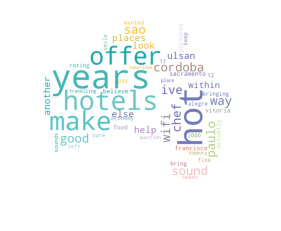

In [114]:
#Additional tasks (just make a words cloud for having some funs)
#Generate words cloud for users

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# x = vector.vocabulary_
image = Image.open('australia.png')
graph = np.array(image)
wc = WordCloud(background_color='White', max_words=50, mask=graph)
wc.generate_from_frequencies(key_words_user)
image_color = ImageColorGenerator(graph)
plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_color))
plt.axis("off")
plt.show()
wc.to_file('output.png')

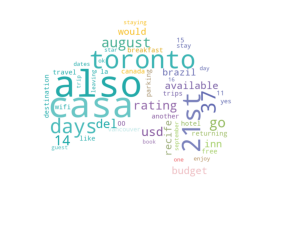

In [115]:
#Additional tasks (just make a words cloud for having some funs)
#Generate words cloud for wizards

image = Image.open('australia.png')
graph = np.array(image)
wc = WordCloud(background_color='White', max_words=50, mask=graph)
wc.generate_from_frequencies(key_words_wizard)
image_color = ImageColorGenerator(graph)
plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_color))
plt.axis("off")
plt.show()
wc.to_file('output1.png')

In [116]:
from spacy.matcher import Matcher
from spacy.tokens import Token

In [119]:
#Utility funtion for testing
docs = [nlp(i) for i in texts_user[:50]]

In [120]:
"""
Patterns for DST and ORG
pattern1 : to+PROPN for dst and org  (E.g. to...from...)
pattern2 : from+PROPN                (E.g. from...to....)
pattern3 : VERB+PROPN                (E.g. visit Neverland)
"""

locs = []
l_pattern1 = [{"TEXT": "to"}, {"POS": "PROPN"}]
l_pattern2 = [{"TEXT": "from"}, {"POS": "PROPN"}]
l_pattern3 = [{"POS": "VERB"}, {"POS": "PROPN"}]
def loc_pattern1(sent):
    matcher = Matcher(nlp.vocab)
    matcher.add("ADP+PROPN && VERB+PROPN", [l_pattern1, l_pattern2])
    matches = matcher(sent, as_spans=True)
    app = {}
    for i in matches:
        if str(i[0]) == 'to':
            app['dst'] = str(i[1:])
        elif str(i[0]) == 'from':
            app['org'] = str(i[1:])
    return app

def loc_pattern2(sent):
    matcher = Matcher(nlp.vocab)
    matcher.add("VERB+PROPN", [l_pattern3])
    matches = matcher(sent, as_spans=True)
    app = {}
    for i in matches:
        app['dst'] = str(i[1:])
    return app

#print some texts with patterns 
for i in range(len(docs[:50])):
    get_matches = loc_pattern1(docs[i]), loc_pattern2(docs[i])
    print((get_matches), docs[i])

({'dst': 'Atlantis', 'org': 'Caprica'}, {}) I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.
({'dst': 'Neverland', 'org': 'Caprica'}, {}) Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.
({'org': 'Atlantis'}, {}) I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?
({}, {}) I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your help
({'org': 'Gotham', 'dst': 'Mos'}, {}) Hello, I am looking to book a vacation from Gotham City to Mos Eisley for $2100.
({'org': 'Gotham', 'dst': 'Neverland'}, {}) What about a trip from Gotham City to Neverland for the same budget?
({'dst': 'Mos'}, {}) Would any packages to Mos Eisley be available if I increase my budget to $2500?
({}, {'dst': 'Neverland'}) You know what, I'd like to try and visit Neve

In [121]:
"""
Patterns for how many people 
NUM + NOUN (E.g. 5 adults)
NOUN + AUX + NUM (E.g. Our kids are 12)
NOUN + AUX + VERB + NUM (E.G Our number kids would be 12)

"""

n_pattern1 = [{"POS": "NUM"}, {"POS": "NOUN"}]
n_pattern2 = [{"POS": "NOUN"}, {"POS": "AUX"}, {"POS": "NUM"}]
n_pattern3 = [{"POS": "NOUN"}, {"POS": "AUX"}, {"POS": "VERB"}, {"POS": "NUM"}]

def num_pattern(sent, pattern):
    keys = [list(i.values()) for i in pattern]
    label = '+'.join([x for xs in keys for x in xs])
    matcher = Matcher(nlp.vocab)
    matcher.add(label, [pattern])
    matches = matcher(sent, as_spans=True)
    return matches

def num_pattern1(sent):
    return num_pattern(sent, n_pattern1)

def num_pattern2(sent):
    return num_pattern(sent, n_pattern2)

def num_pattern3(sent):
    return num_pattern(sent, n_pattern3)

#print some texts with patterns
for i in range(len(docs[:30])):
    get_matches = num_pattern1(docs[i]),  num_pattern2(docs[i]), num_pattern3(docs[i])
    print(get_matches, docs[i])

([8 adults], [], []) I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.
([5 adults], [], [budget would be 1900]) Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.
([], [], []) I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?
([], [], []) I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your help
([], [], []) Hello, I am looking to book a vacation from Gotham City to Mos Eisley for $2100.
([], [], []) What about a trip from Gotham City to Neverland for the same budget?
([], [], []) Would any packages to Mos Eisley be available if I increase my budget to $2500?
([], [], []) You know what, I'd like to try and visit Neverland
([], [], []) Do you have any trips from Gotham City to Kobe for my original budget of $2100?
([], [], []) No

In [122]:
"""
6 patterns for dates
1. PROPN + NUM                 e.g August 13
2. NUM + PROPN                 e.g. 13 August
3. NOUN + ADP +PROPN           e.g. 13th of August
4. NOUN + PROPN                e.g. 13th August
5. PROPN + NOUN                e.g. August 13th
6. PROPN + NUM + PROPN + NUM   e.g. Monday, 12 Jan, 2016
"""

d_pattern1 = [{"POS": "PROPN"}, {"POS": "NUM"}]
d_pattern2 = [{"POS": "NUM"}, {"POS": "PROPN"}]
d_pattern3 = [{"POS": "NOUN"}, {"POS": "ADP"}, {"POS": "PROPN"}]
d_pattern4 = [{"POS": "NOUN"}, {"POS": "PROPN"}]
d_pattern5 = [{"POS": "PROPN"}, {"POS": "NOUN"}]
d_pattern6 = [{"POS": "PROPN"}, {"POS": "NUM"}, {"POS": "PROPN"}, {"POS": "NUM"}]

def date_pattern(sent, pattern):
    keys = [list(i.values()) for i in pattern]
    label = '+'.join([x for xs in keys for x in xs])
    matcher = Matcher(nlp.vocab)
    matcher.add(label, [pattern])
    matches = matcher(sent, as_spans=True)
    return matches

def date_pattern1(sent):  
    return date_pattern(sent, d_pattern1)
    
def date_pattern2(sent):
    return date_pattern(sent, d_pattern2)

def date_pattern3(sent):
    return date_pattern(sent, d_pattern3)
    
def date_pattern4(sent):
    return date_pattern(sent, d_pattern4)

def date_pattern5(sent):
    return date_pattern(sent, d_pattern5)

def date_pattern6(sent):
    return date_pattern(sent, d_pattern6)


#print some texts with patterns
for i in range(len(docs[:50])):
    get_matches = date_pattern1(docs[i]),  date_pattern2(docs[i]), date_pattern3(docs[i]),  \
    date_pattern4(docs[i]), date_pattern5(docs[i]), date_pattern5(docs[i])
    print(get_matches, docs[i])

([August 13], [], [trip to Atlantis], [], [], []) I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.
([August 13], [], [], [], [], []) Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.
([], [], [], [], [], []) I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?
([], [], [], [], [], []) I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your help
([], [], [vacation from Gotham], [], [], []) Hello, I am looking to book a vacation from Gotham City to Mos Eisley for $2100.
([], [], [trip from Gotham], [], [], []) What about a trip from Gotham City to Neverland for the same budget?
([], [], [packages to Mos], [], [], []) Would any packages to Mos Eisley be available if I increase my budget to $2500?
([], [], [], [], [], []) You know what,

In [123]:
"""
patterns for budget
1. SYM + NUM e.g. $2400
2. VERB + NUM e.g. would be 2400
3. AUX + NUM  e.g. My budget is 2400
4. between+NUM+and+NUM" e.g. My budget is between 2400 and 3000
"""

b_pattern1 = [{"POS": "SYM"}, {"POS": "NUM"}]
b_pattern2 = [{"POS" : "VERB"}, {"POS" : "NUM"}]
b_pattern3 = [{"POS" : "AUX"}, {"POS" : "NUM"}]
b_pattern4 = [{"TEXT" : "between"}, {"POS" : "NUM"}, {"TEXT": "and"}, {"POS" : "NUM"}]
    
def budget_pattern(sent, pattern):
    keys = [list(i.values()) for i in pattern]
    label = '+'.join([x for xs in keys for x in xs])
    matcher = Matcher(nlp.vocab)
    matcher.add(label, [pattern])
    matches = matcher(sent, as_spans=True)
    return matches

def budget_pattern1(sent):  
    return budget_pattern(sent, b_pattern1)

def budget_pattern2(sent):
    return budget_pattern(sent, b_pattern2)

def budget_pattern3(sent):
    return budget_pattern(sent, b_pattern3)

def budget_pattern4(sent):
    return budget_pattern(sent, b_pattern4)


for i in range(len(docs[:50])):
    get_matches = budget_pattern1(docs[i]), budget_pattern2(docs[i]), budget_pattern3(docs[i]),budget_pattern4(docs[i])
    #get_matches = budget_pattern1(docs[i])
    print(get_matches, docs[i])

([], [], [], []) I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.
([], [be 1900], [], []) Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.
([], [], [], []) I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?
([], [], [], []) I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your help
([$2100], [], [], []) Hello, I am looking to book a vacation from Gotham City to Mos Eisley for $2100.
([], [], [], []) What about a trip from Gotham City to Neverland for the same budget?
([$2500], [], [], []) Would any packages to Mos Eisley be available if I increase my budget to $2500?
([], [], [], []) You know what, I'd like to try and visit Neverland
([$2100], [], [], []) Do you have any trips from Gotham City to Kobe for my original budget of 

In [124]:
"""
Linguistic Patterns Task 2 & Chatbot Implementation Task 1
Design 4 intents location, date, budget, num
Save text pairs according to these 4 intents to new.json
"""

#Get all text pairs with tuples(text_user, text_reply)
texts_pair = [(df['turns'][i][j-1]['text'], df['turns'][i][j]['text']) for i in range(len(df)) 
              for j in range(len(df['turns'][i])) if df['turns'][i][j]['author'] == "wizard"]

#Init new_json dict object
new_json = {'location': [], 'budget': [], 'num': [], 'date': []}

#Save text pairs according to each intents
for i in range(len(texts_pair)):
    pairs = nlp(' '.join(texts_pair[i]))
    ents = [(e.label_) for e in pairs.ents]
    if "GPE" in ents:
        new_json['location'].append(texts_pair[i])
        
    elif "DATE" in ents:
        new_json['date'].append(texts_pair[i])
            
    elif "MONEY"  in ents:
        new_json['budget'].append(texts_pair[i])
        
    elif "CARDINAL" in ents:
        new_json['num'].append(texts_pair[i])
        
#Write new_json to json file
new_json = json.dumps(new_json)
with open('new.json', 'w') as f:
    f.write(new_json)

In [125]:
#Linguistic Patterns Task 3
#Loads the new_json we just genrate
with open("new.json", 'r') as f:
    temp = json.loads(f.read())

In [126]:
#Linguistic Patterns Task 3
#Extract 10 text pairs according to  intents budget
temp['budget'][:10]

[['Would any packages to Mos Eisley be available if I increase my budget to $2500?',
  'There are no trips available to Mos Eisley.'],
 ['That sounds lavish, what type of flight would that be?',
  'You would be flying business class, for a grand total of only $1858.14'],
 ['Are there any possible flights with economy class?',
  'I have a package at the Lunar whcih has a 5 star rating on an economy class flight on the same dates for $1558.00'],
 ['I have $12600 to spend on this vacation',
  'It would be helpful if you could provide me with some dates'],
 ["Hi, I have a big family and we can't afford a big vacation, we want to go to Atlantis from Mos Eisley for $3600 at most.",
  'Do you have a preferred set of dates for this trip?'],
 ["Hi, I'm leaving from Diagon Alley and going to Coruscant on a budget of $3400. The dates don't matter, but I cannot afford anything over my budget.",
  'And how many children and adults will you be bringing with you?'],
 ['No I cannot do another location

In [127]:
#Linguistic Patterns Task 3
#Extracting budget from intents "budget" with linguistic patterns
bud = [(budget_pattern1(nlp(i[1])), budget_pattern2(nlp(i[1])), budget_pattern3(nlp(i[1])), budget_pattern4(nlp(i[1]))) for i in temp['budget']]
bud[:50]

[([], [], [], []),
 ([$1858.14], [], [], []),
 ([$1558.00], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([$2170.90], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([$4253.69, $5295.89], [have two], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([$10000], [], [], []),
 ([$2145, $1900], [], [], []),
 ([$2740], [], [], []),
 ([], [], [], []),
 ([$5315], [has 3], [], []),
 ([$611, $684], [], [], []),
 ([$3453, $2500], [], [], []),
 ([$917], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([$4000], [], [], []),
 ([], [], [], []),
 ([$930], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([], [], [], []),
 ([$17903], [], [], []),
 ([], [], [], []),
 ([$2801], [], [], []),
 ([$3731], [], [], []),
 ([], [], [], []),
 ([$2816.73], [], [], []),
 ([$3155.22], [], [], 

In [128]:
#Linguistic Patterns Task 3
#Extracting date from intents "date" with linguistic patterns
dates = [(date_pattern1(nlp(i[1])), date_pattern2(nlp(i[1])), date_pattern3(nlp(i[1])), date_pattern4(nlp(i[1])),
         date_pattern5(nlp(i[1])), date_pattern6(nlp(i[1]))) for i in temp['date']]

In [129]:
dates[:50]

[([], [], [], [], [], []),
 ([], [], [], [], [], []),
 ([August 27], [], [], [am August], [], []),
 ([], [], [], [], [], []),
 ([], [], [], [], [], []),
 ([], [], [], [], [August 24th, September 6th], []),
 ([], [], [], [], [], []),
 ([], [], [25th of August], [], [], []),
 ([], [], [], [], [], []),
 ([], [], [], [], [], []),
 ([], [], [25th of August], [], [], []),
 ([August 25], [], [hotel for 3549.83USD], [], [], []),
 ([], [], [days in Fortaleza], [], [], []),
 ([], [], [], [], [August 17th], []),
 ([], [], [availability on August], [], [August 19th], []),
 ([], [], [24th to August], [], [August 24th, August 28th], []),
 ([], [], [days in Punta], [], [], []),
 ([],
  [],
  [package for Mainaus, departure on August],
  [],
  [August 27th, August 31st],
  []),
 ([],
  [],
  [trip to Sendai, a.m. to August],
  [],
  [August 15th, August 22nd],
  []),
 ([], [], [days in Manaus], [], [], []),
 ([], [], [], [], [August 19th, August 28th], []),
 ([], [], [days at Scarlet], [], [], []),
 (

In [130]:
#Linguistic Patterns Task 3
#Extracting location from intents "location" with 3 linguistic patterns
locations = [(loc_pattern1(nlp(i[1])), loc_pattern2(nlp(i[1]))) for i in temp['location']]

In [131]:
#linguistic patterns will extract locations with dict to identify destination and original city
locations[:50]

[({}, {}),
 ({}, {}),
 ({'org': 'Gotham', 'dst': 'Mos'}, {}),
 ({'org': 'Gotham'}, {}),
 ({'dst': 'Kobe', 'org': 'Sapporo'}, {}),
 ({'org': 'Birmingham', 'dst': 'Kobe'}, {}),
 ({'dst': 'Birmingham'}, {}),
 ({'org': 'Birmingham', 'dst': 'Kobe'}, {}),
 ({'org': 'Birmingham'}, {}),
 ({}, {}),
 ({}, {}),
 ({}, {}),
 ({'org': 'Toronto', 'dst': 'Calgary'}, {}),
 ({'dst': 'Dominican'}, {}),
 ({}, {}),
 ({}, {}),
 ({}, {}),
 ({'dst': 'Toronto', 'org': 'Busan'}, {}),
 ({}, {'dst': 'Sunday'}),
 ({}, {}),
 ({}, {}),
 ({'org': 'Kochi'}, {'dst': 'September'}),
 ({}, {}),
 ({'org': 'Calgary'}, {}),
 ({}, {}),
 ({'dst': 'Vancouver'}, {}),
 ({}, {}),
 ({}, {}),
 ({}, {}),
 ({}, {}),
 ({'org': 'Melbourne'}, {}),
 ({'org': 'Melbourne', 'dst': 'Mexico'}, {}),
 ({'org': 'Melbourne'}, {}),
 ({}, {'dst': 'Pittsborgh'}),
 ({}, {}),
 ({'dst': 'Vancouver'}, {}),
 ({}, {}),
 ({}, {}),
 ({}, {}),
 ({'org': 'Santos'}, {}),
 ({'org': 'Detroit'}, {}),
 ({'org': 'Detroit'}, {}),
 ({'dst': 'Vancouver', 'org': 'Dublin

In [132]:
#Extracting number of persons from intents "num" with 3 linguistic patterns
num = [(num_pattern1(nlp(i[1])), num_pattern2(nlp(i[1])), num_pattern3(nlp(i[1]))) for i in temp['num']]

In [133]:
#These linguistic patterns would be further processed in chatbot implementation to get better results
num[:50]

[([], [], []),
 ([], [], []),
 ([], [], []),
 ([3.0 stars, 7.15 stars], [], []),
 ([], [], []),
 ([1644.98 USD], [package is 1644.98], []),
 ([5 stars], [hotel is 5], []),
 ([], [], []),
 ([], [], []),
 ([], [], []),
 ([], [], []),
 ([], [], []),
 ([two options, 2314.59 USD, 2981.83 USD], [], []),
 ([three adults], [], []),
 ([2.5 stars], [], []),
 ([4 star], [], []),
 ([], [], []),
 ([4.0 star], [hotels are 4.0], []),
 ([], [], []),
 ([], [], []),
 ([3 stars], [rating is 3], []),
 ([], [], []),
 ([], [], []),
 ([3.5 star], [], []),
 ([], [], []),
 ([], [], []),
 ([0.0 star], [], []),
 ([4.0 star], [], []),
 ([], [], []),
 ([4.0 star], [], []),
 ([], [], []),
 ([5 stars], [], []),
 ([5.0 stars], [], []),
 ([2.0 stars], [], []),
 ([], [], []),
 ([4.0 star], [], []),
 ([4.0 stars], [hotel is 4.0], []),
 ([four star], [], []),
 ([], [], []),
 ([3 stars], [hotel is 3], []),
 ([], [], []),
 ([4 star], [], []),
 ([], [], []),
 ([], [], []),
 ([], [], []),
 ([], [], []),
 ([], [], []),
 ([], 

In [ ]:
"""
Chatbot implementation is in the project1_bot.py
"""